In [1]:
# imports
import sys
sys.path.append( '..' )

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from significance_analysis import *

sns.set_theme(rc={"figure.figsize":(12, 6)})

In [2]:
# Load matrices
strains = pd.read_csv("/mnt/d/data/Com8_grown_together/strains.tsv", sep="\t")
comm8 = pd.read_csv("/mnt/d/data/Com8_grown_together/comm8.tsv", sep="\t")
metData = pd.read_csv("/mnt/d/data/Com8_grown_together/metData.tsv", sep="\t")
metData.index = pd.read_csv("/mnt/d/data/Com8_grown_together/metName.tsv", sep="\t")

met_raw_pos = pd.read_excel("/mnt/d/data/Com8_grown_together/FIA-Data Com8_20230717_P0024_msAV206-312.xlsx", sheet_name="pos")
met_raw_neg = pd.read_excel("/mnt/d/data/Com8_grown_together/FIA-Data Com8_20230717_P0024_msAV206-312.xlsx", sheet_name="neg")
met_raw_comb = pd.concat( [total_ion_count_normalization( join_df_metNames(met_raw_pos) ),
                           total_ion_count_normalization( join_df_metNames(met_raw_neg) )] )

X = met_raw_comb.transpose()

In [3]:
results = test_metabolites_organism(data=X, community_composition=comm8, organism_idx=0, alpha=1e-21, test=f_oneway)

## Plotting

In [4]:
figures, test_stats, includes = plot_volcanos(X, strains, comm8, sig_p=0.05, sig_fc_pos=4, sig_fc_neg=0.25,
                                              color_map={}, show_labels=False, outfolder="../../reports/FIA/metabalysis")

In [5]:
figures.get('C. ramosum')

## Inspection

In [6]:
metabs_of_interest, p_vals = extract_metabolites_of_interest(test_stats)

100%|██████████| 8/8 [00:00<00:00, 25.88it/s]


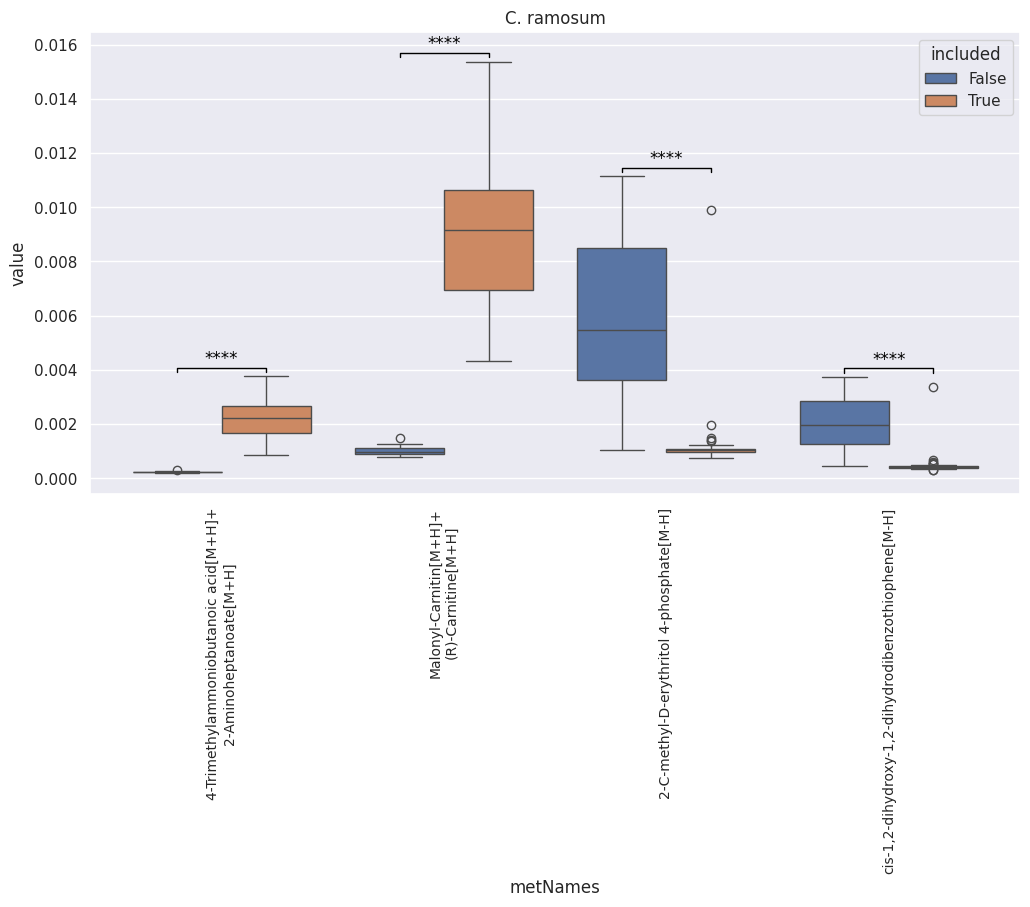

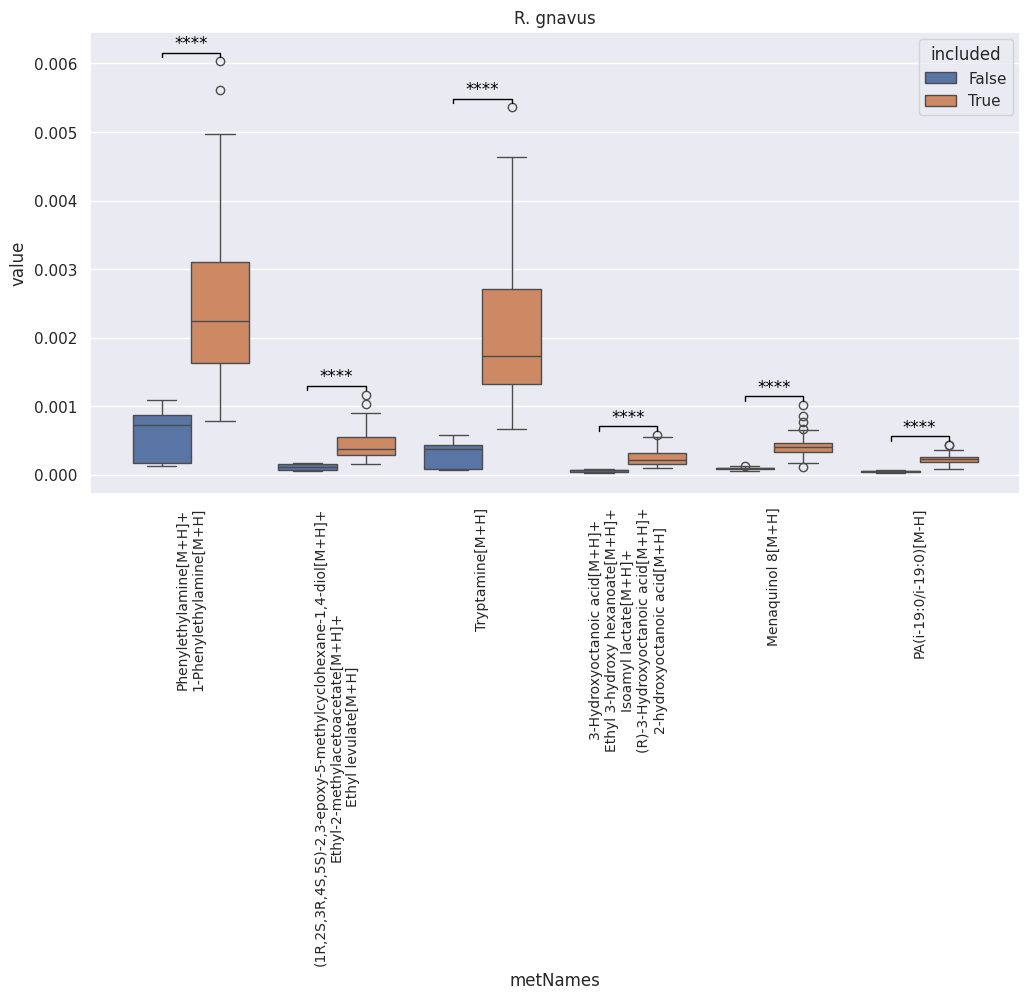

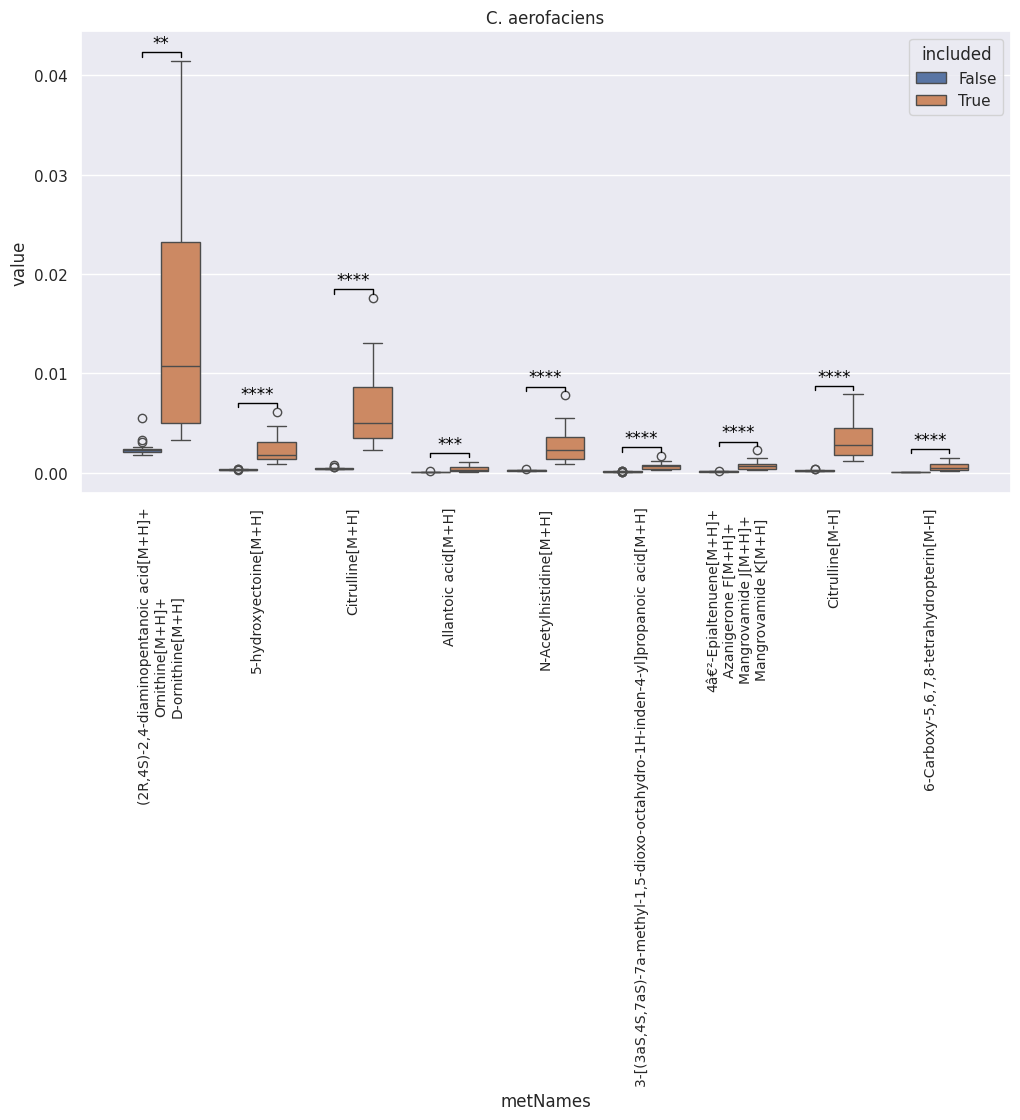

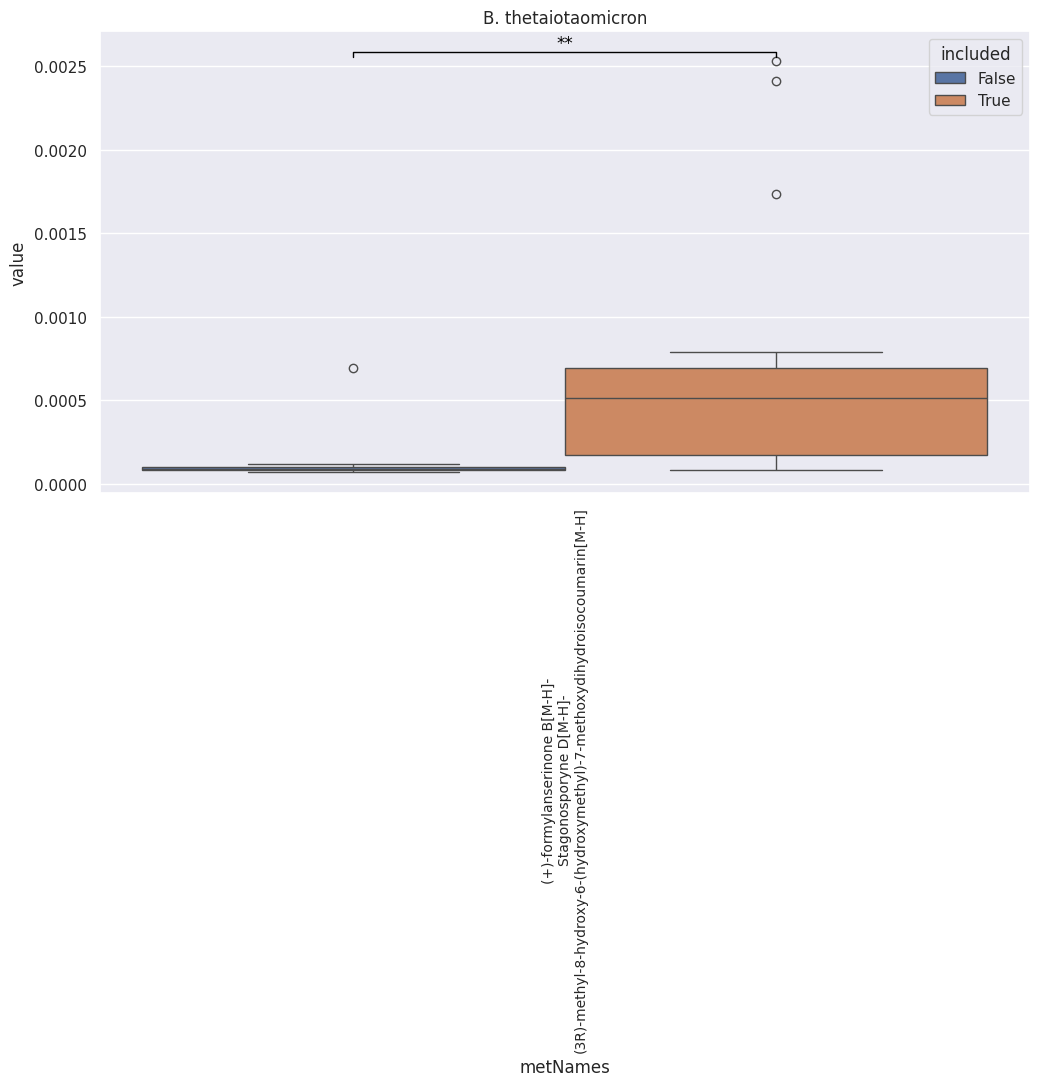

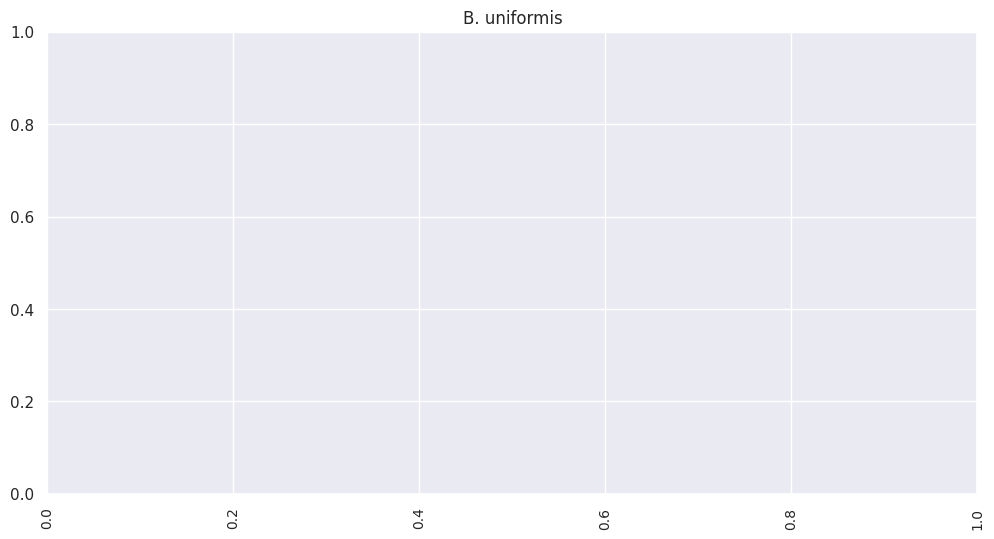

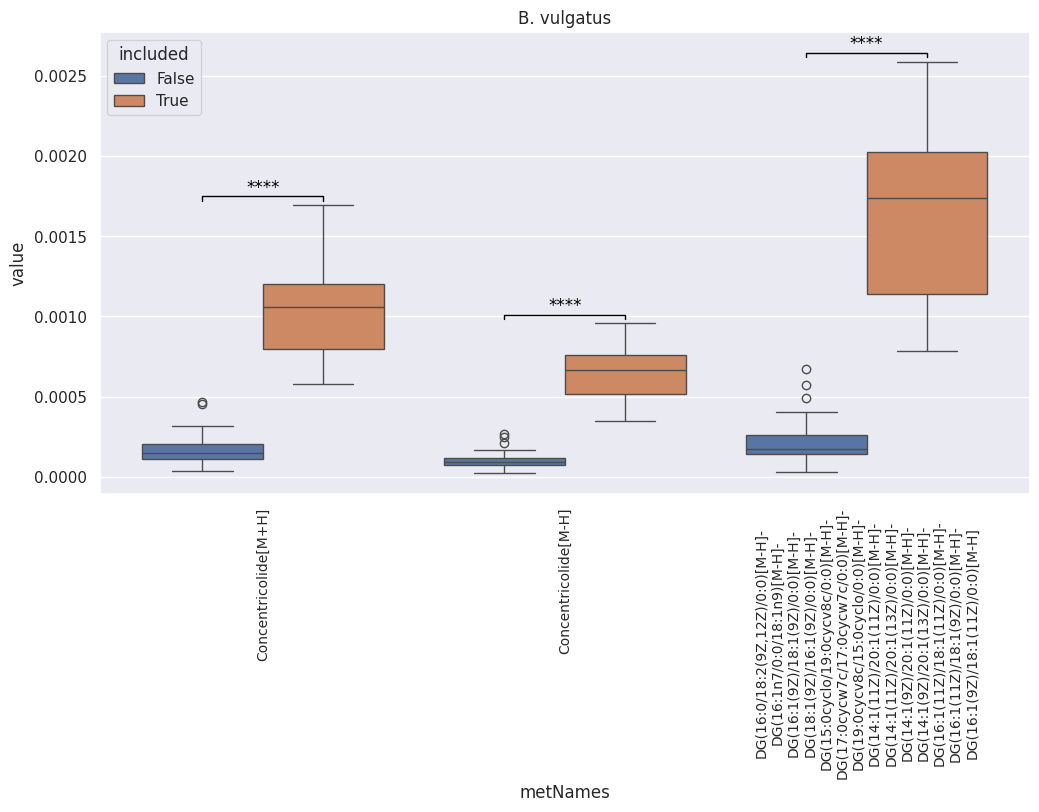

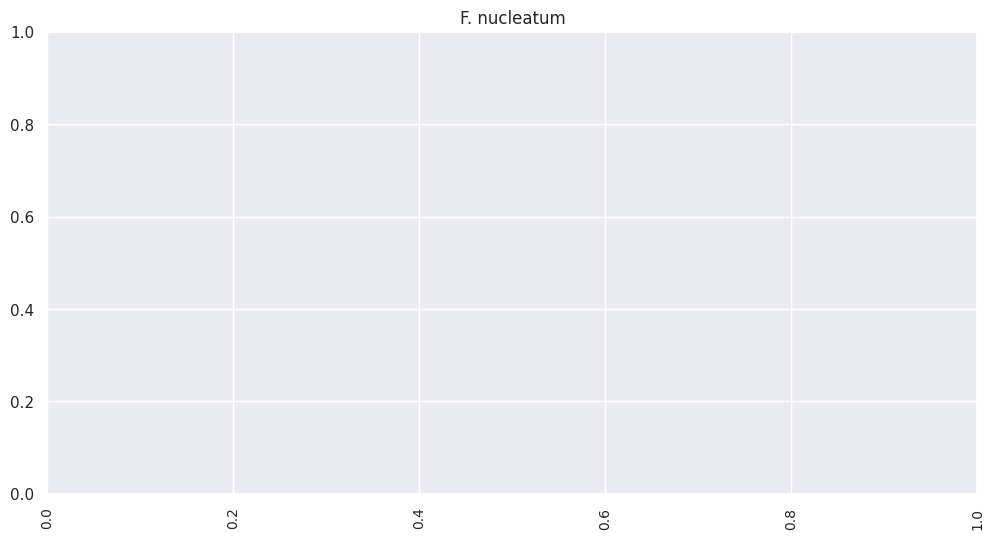

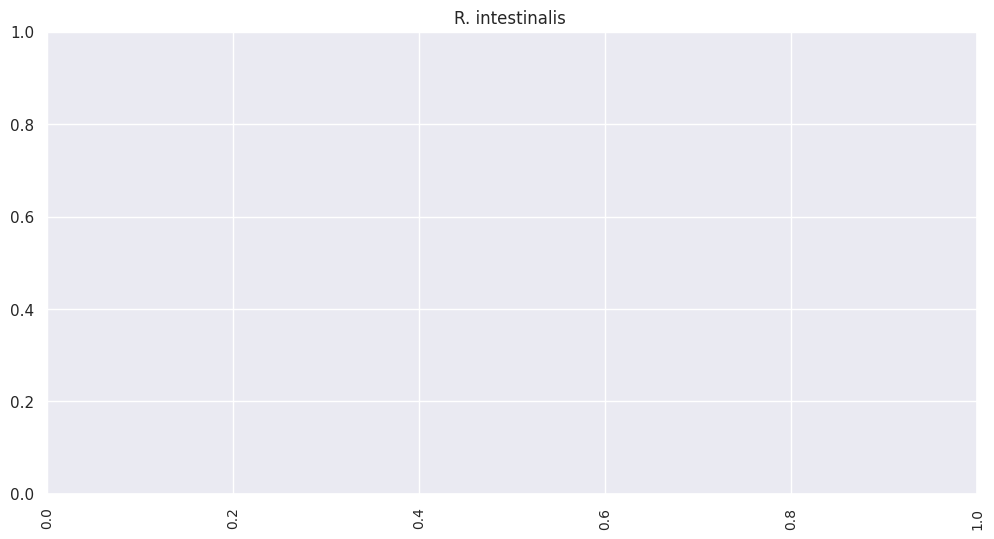

In [7]:
plots, axs = significance_plot_batch(metabs_of_interest, includes, p_vals)

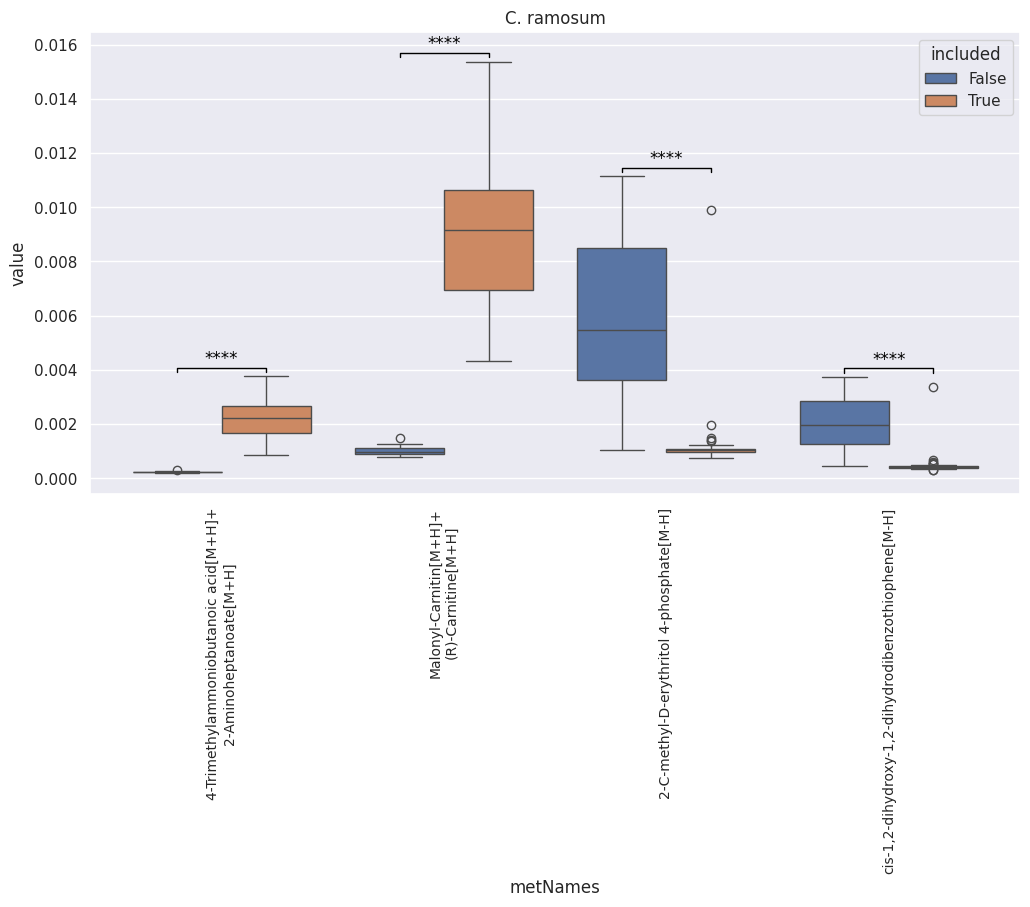

In [8]:
plots.get("C. ramosum")

## Comparison to classification

In [9]:
importances_df = pd.read_csv("../../reports/ML/XGBoost/feature_importance_2.tsv", sep="\t")

100%|██████████| 8/8 [00:00<00:00, 16.97it/s]


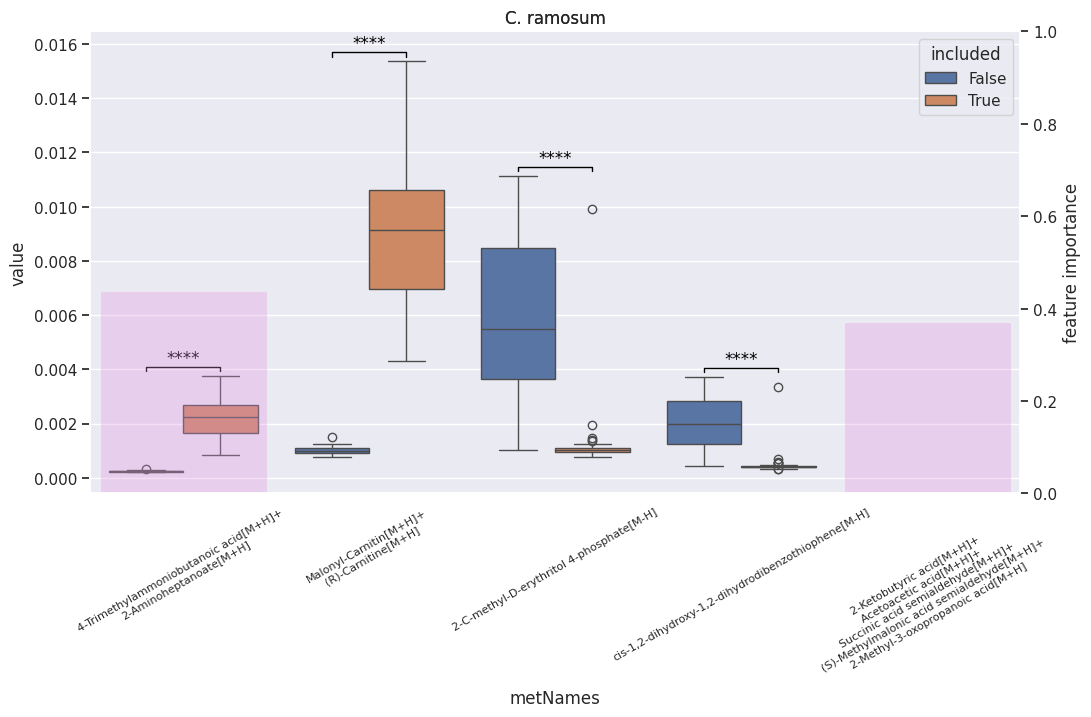

<Figure size 1200x600 with 0 Axes>

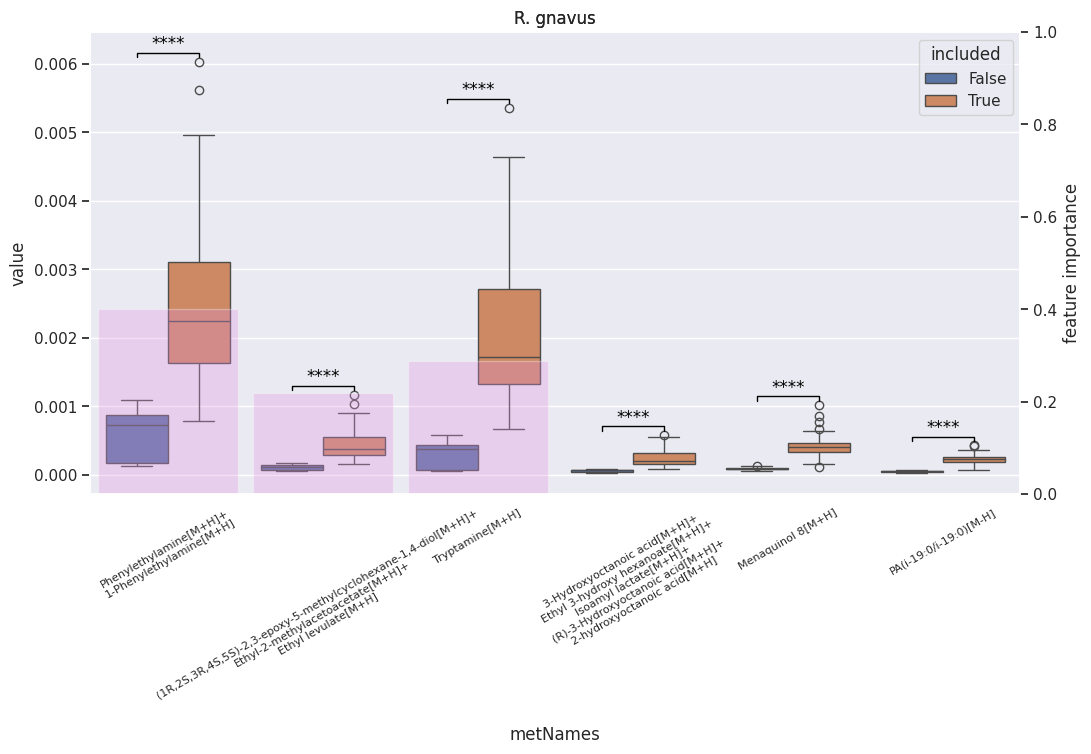

<Figure size 1200x600 with 0 Axes>

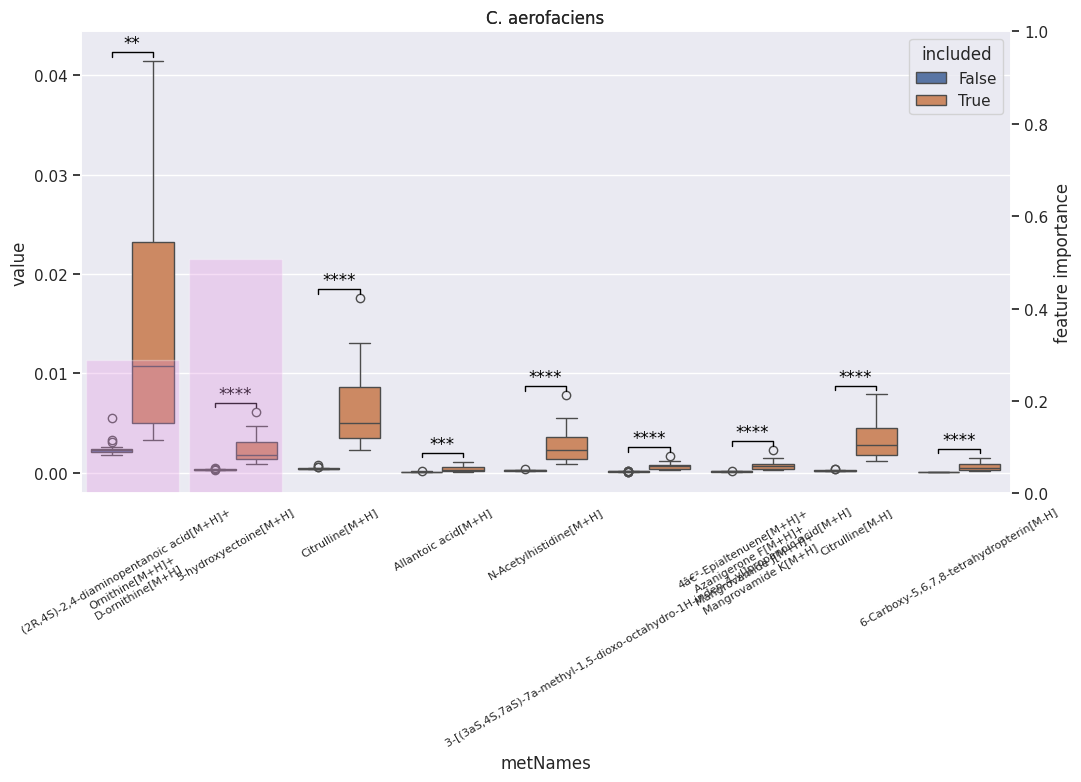

<Figure size 1200x600 with 0 Axes>

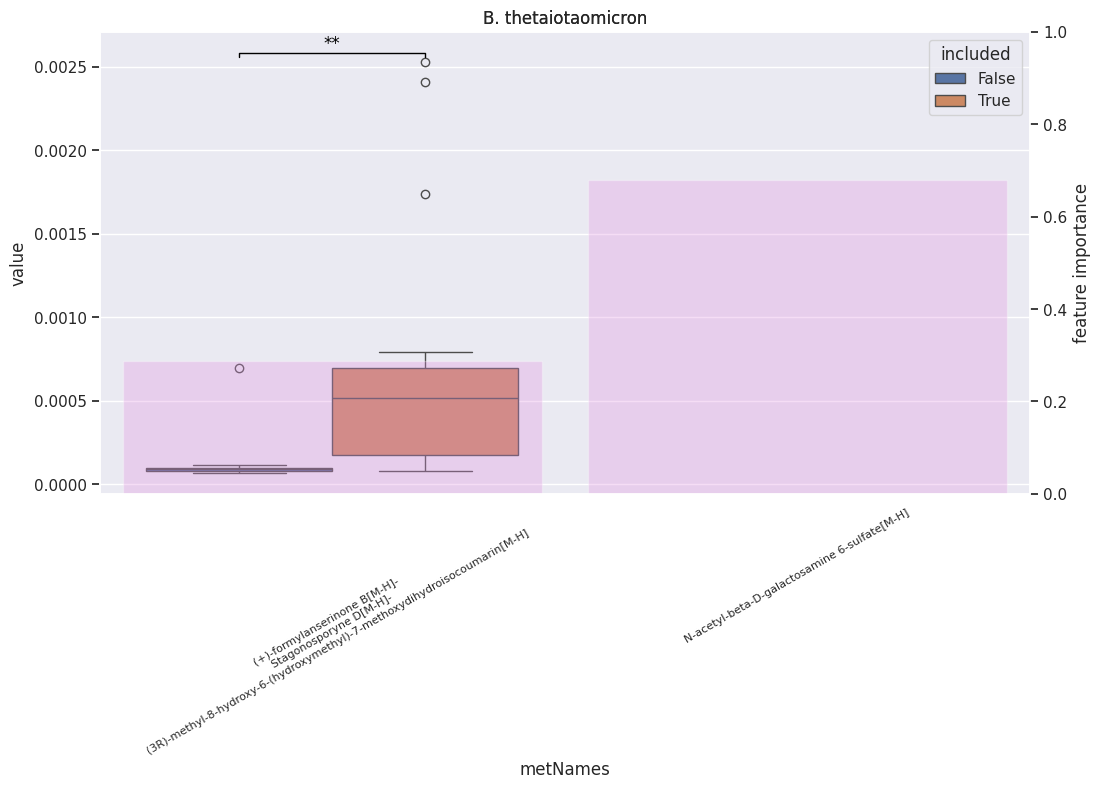

<Figure size 1200x600 with 0 Axes>

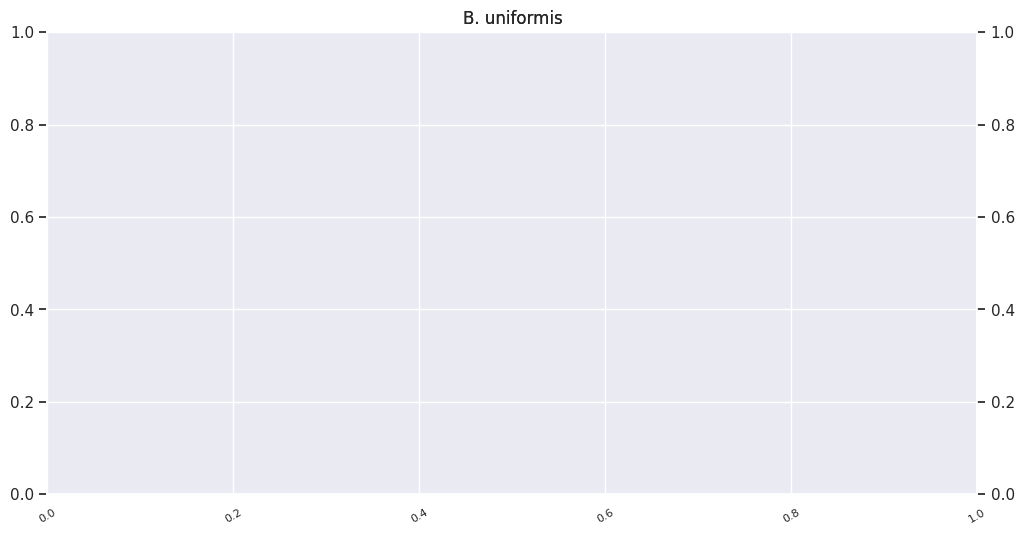

<Figure size 1200x600 with 0 Axes>

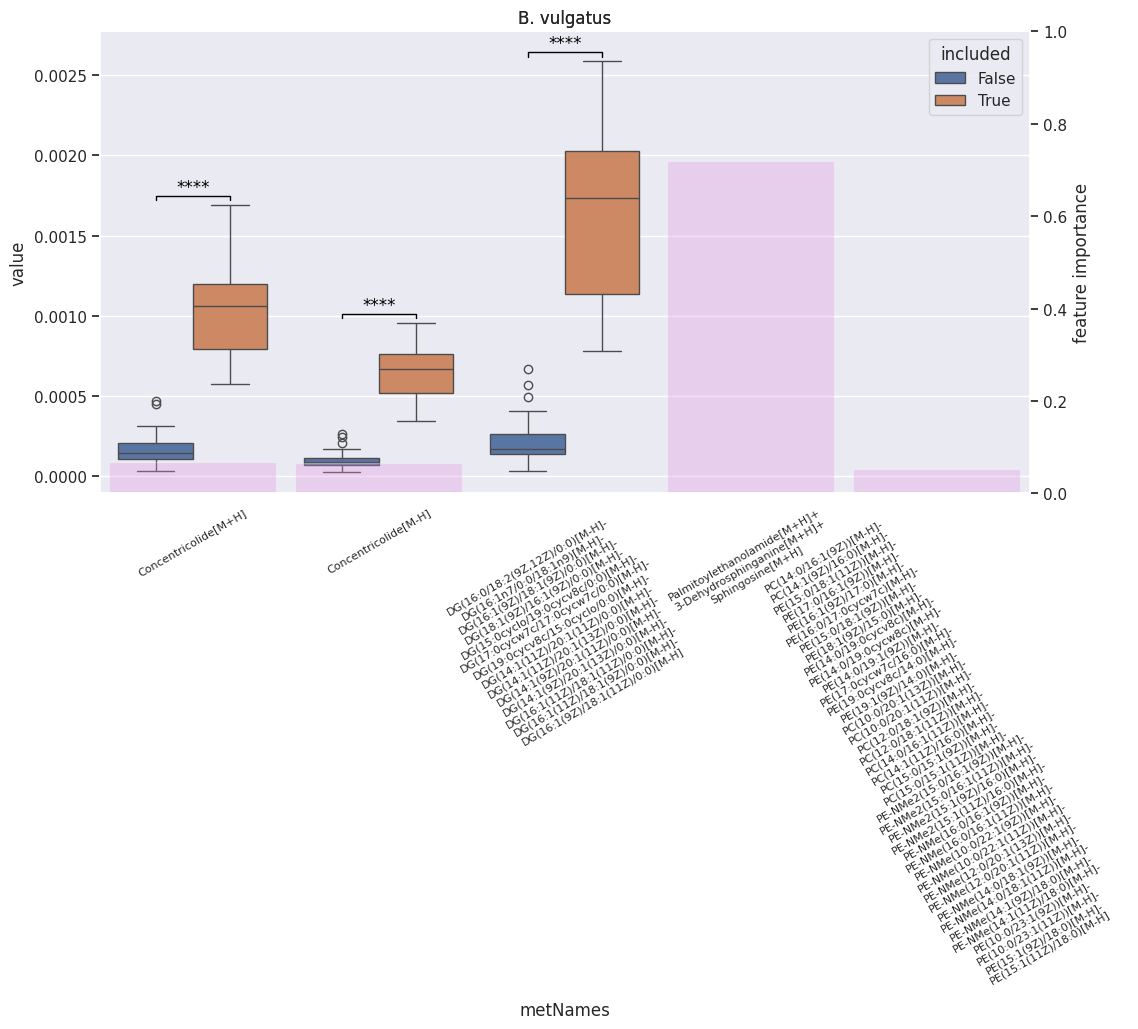

<Figure size 1200x600 with 0 Axes>

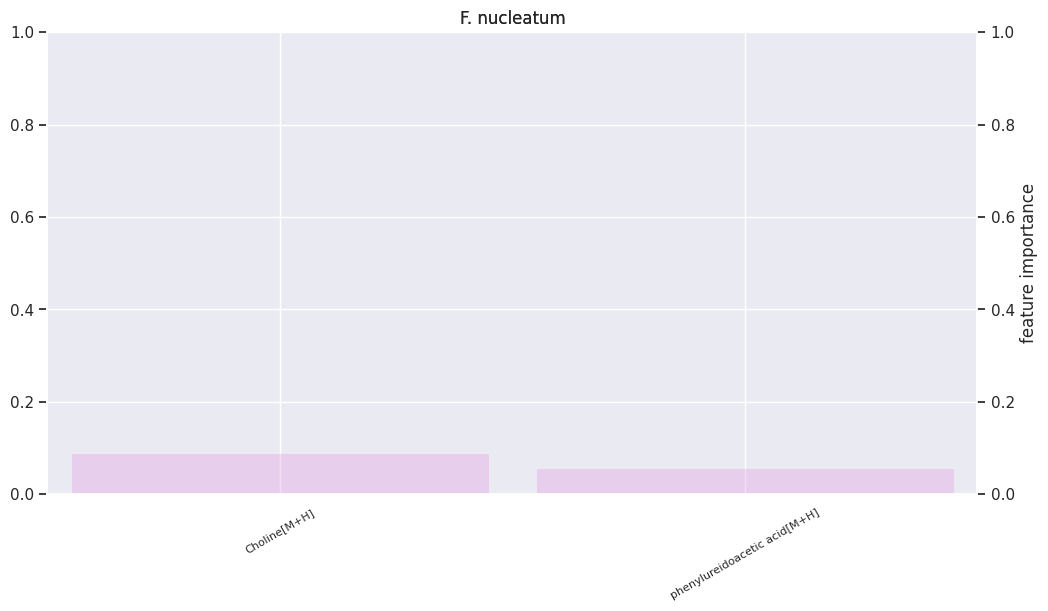

<Figure size 1200x600 with 0 Axes>

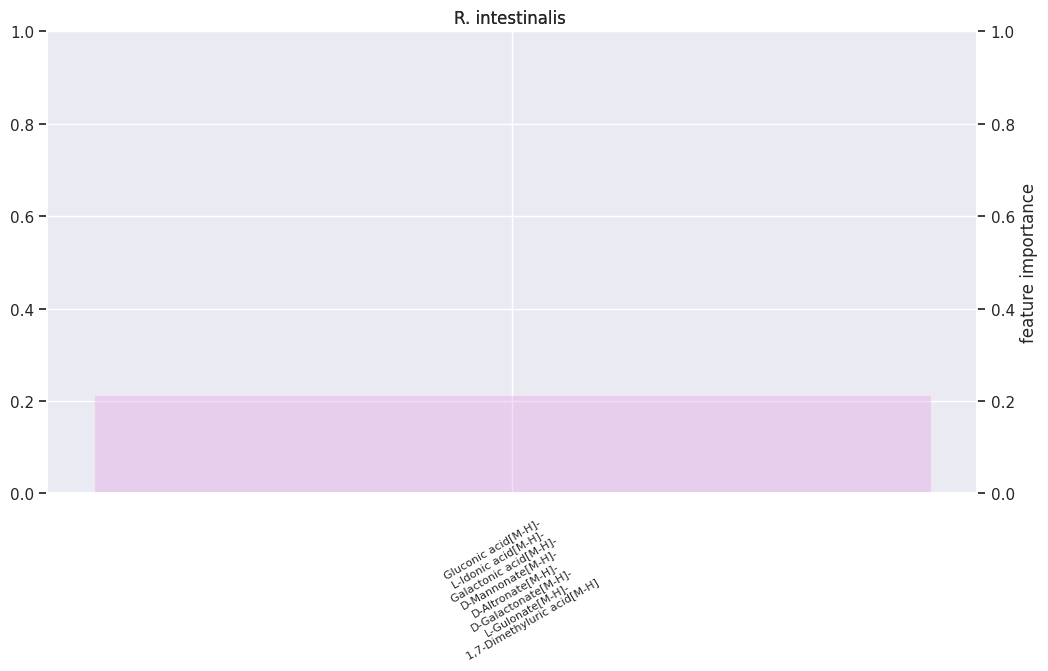

<Figure size 1200x600 with 0 Axes>

In [10]:
plots, axs = significance_importance_plot_batch(metabs_of_interest, importances_df, includes, p_vals, importance_cutoff=0.05, x_label_rot=30)

### Other way around

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:15<00:00,  1.92s/it]


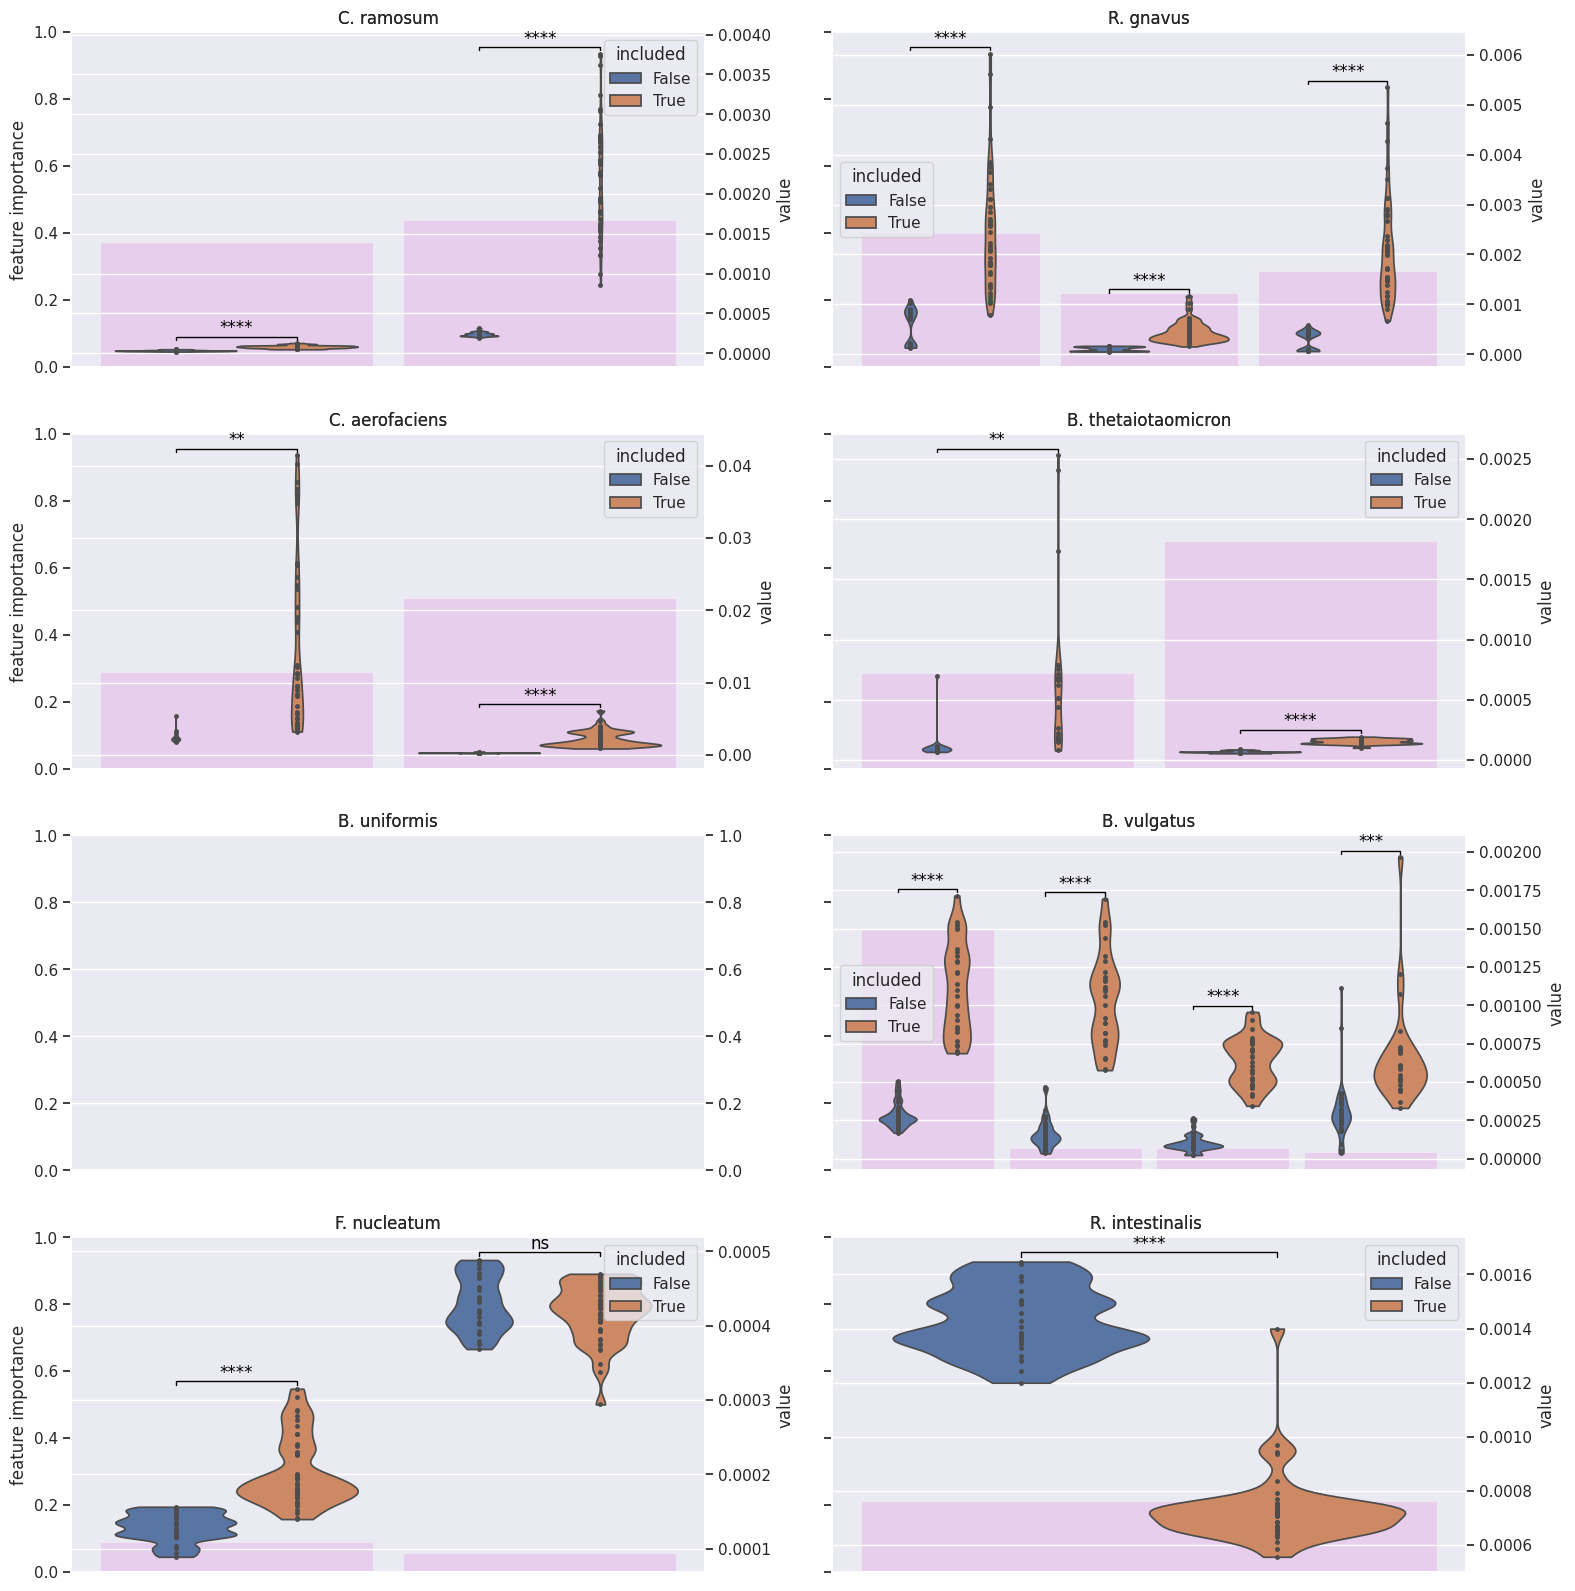

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [11]:
fig, axes = plt.subplots(4, 2,  figsize=(18,20), sharey=True)
plots, axs = importance_significance_plot_batch(test_stats, importances_df, includes, importance_cutoff=0.05, x_label_rot=0, x_labelsize=8, plottype="violin", axes=axes)
for ax in fig.get_axes():
    ax.set_xticks([])
    ax.set_xlabel("")
plt.show()

## Combination COM8

In [12]:
com_2, org_2 = combine_organisms(comm8, strains)

In [13]:
results_2 = test_metabolites_organism(data=X, community_composition=com_2, organism_idx=0, alpha=1e-21, test=f_oneway)

In [14]:
figures_2, test_stats_2, includes_2 = plot_volcanos(X, org_2, com_2, sig_p=0.05, sig_fc_pos=4, sig_fc_neg=0.25,
                                                    color_map={}, show_labels=False, outfolder="../../reports/FIA/metabalysis")

In [15]:
figures_2.get(list(figures_2.keys())[8])

#### Interesting metabolites

In [16]:
metabs_of_interest_2, p_vals_2 = extract_metabolites_of_interest(test_stats_2)

 68%|██████▊   | 19/28 [00:00<00:00, 45.02it/s]/mnt/c/Users/JosuaCarl/Desktop/Thesis/MStoML/skripts/FIA/significance_analysis.py:150: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

100%|██████████| 28/28 [00:00<00:00, 44.47it/s]


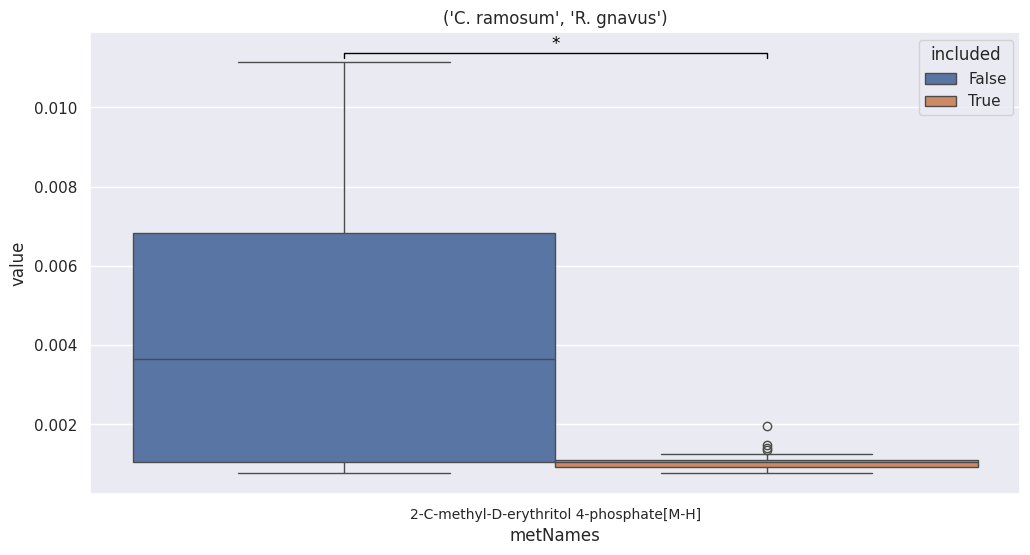

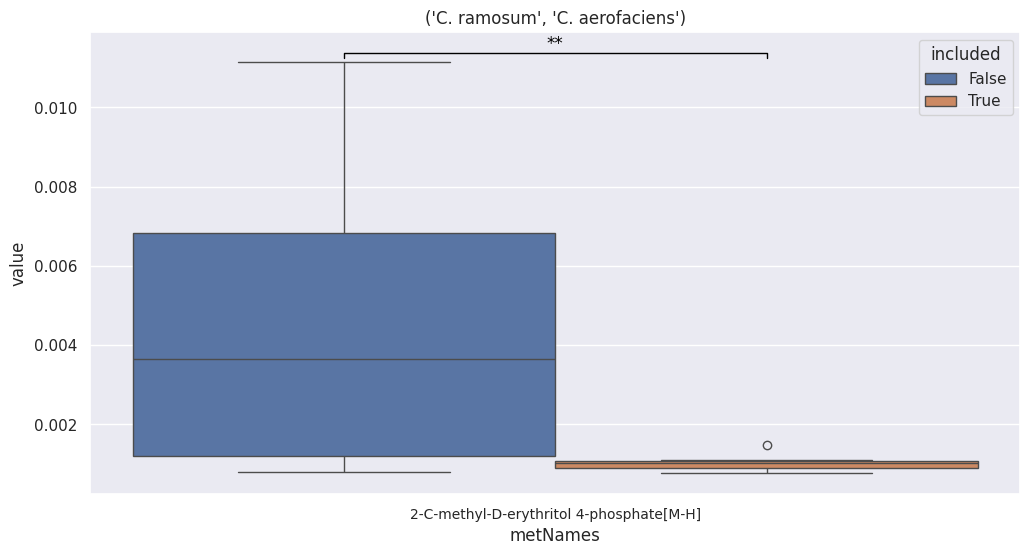

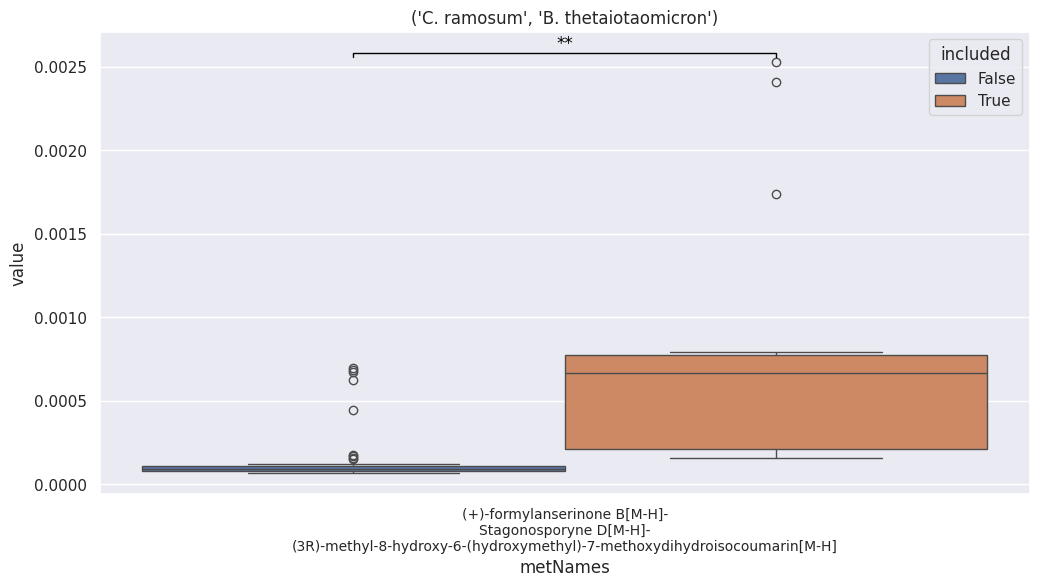

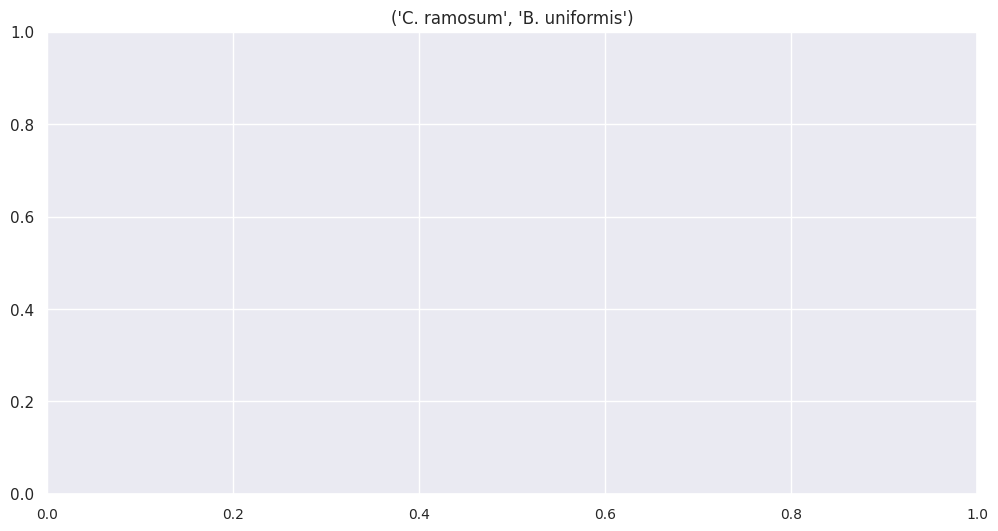

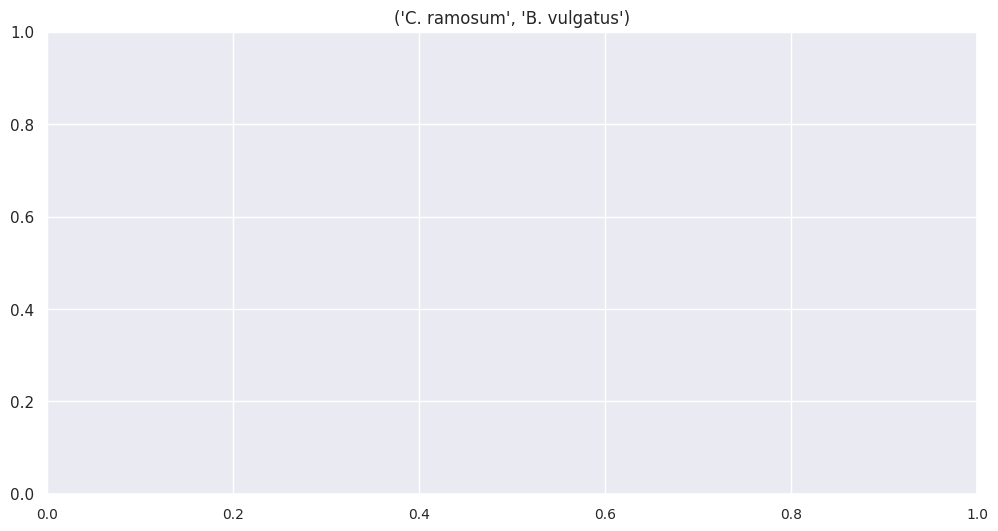

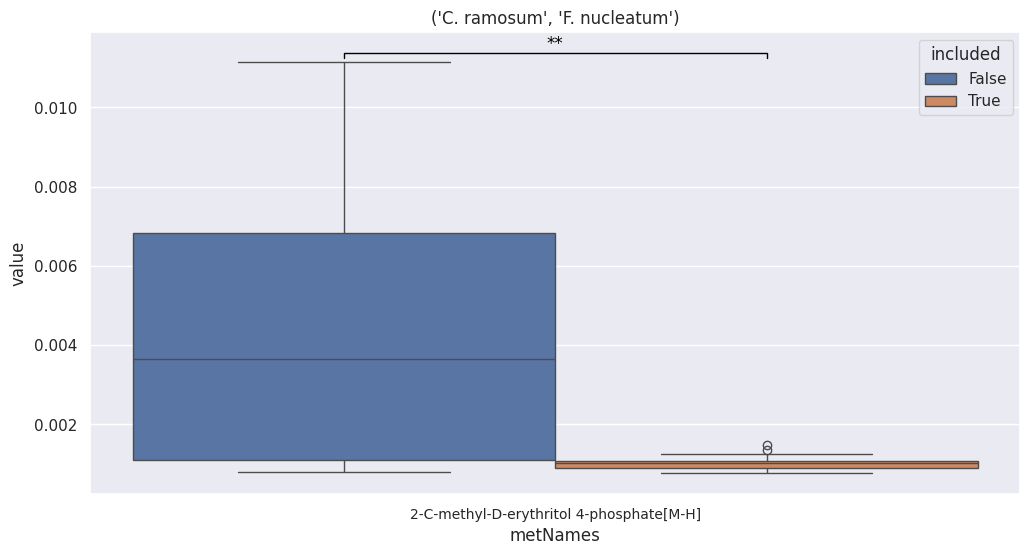

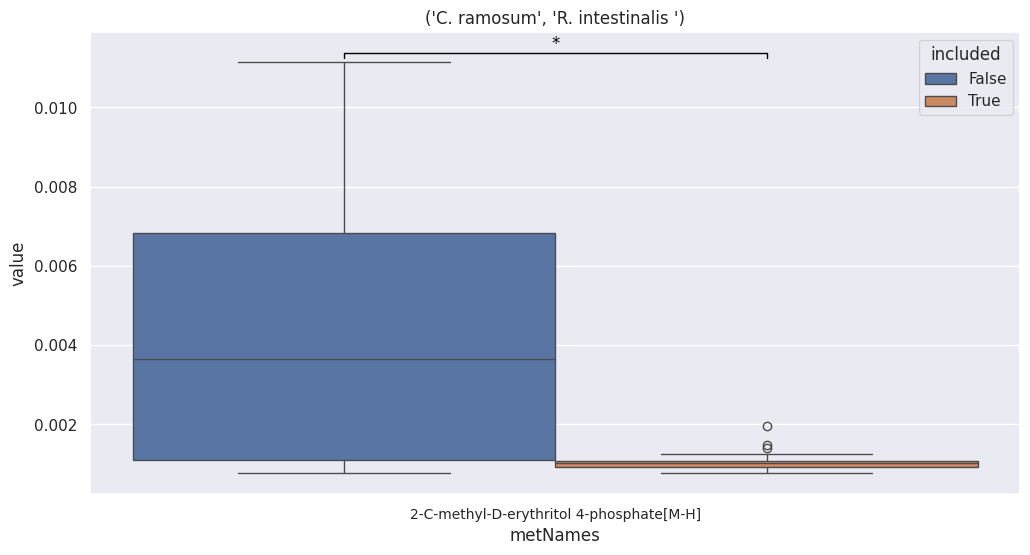

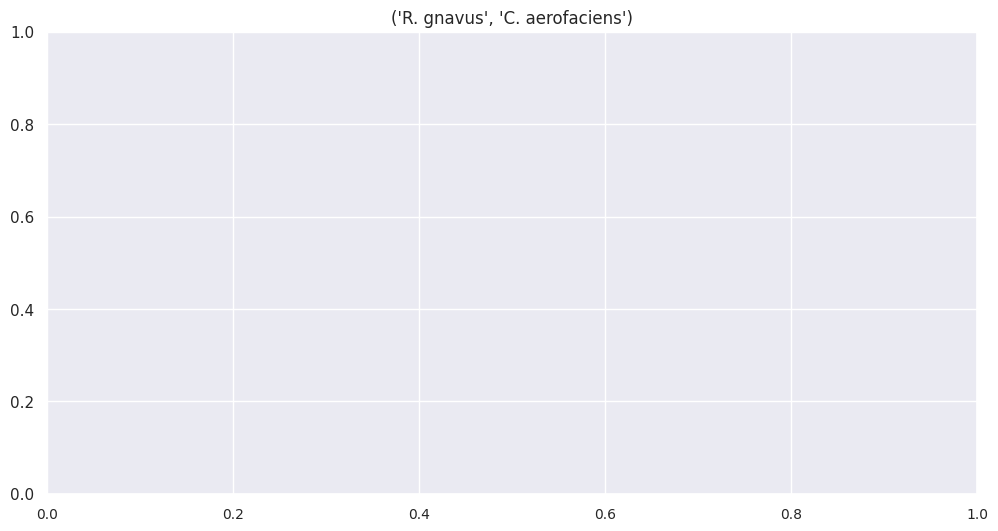

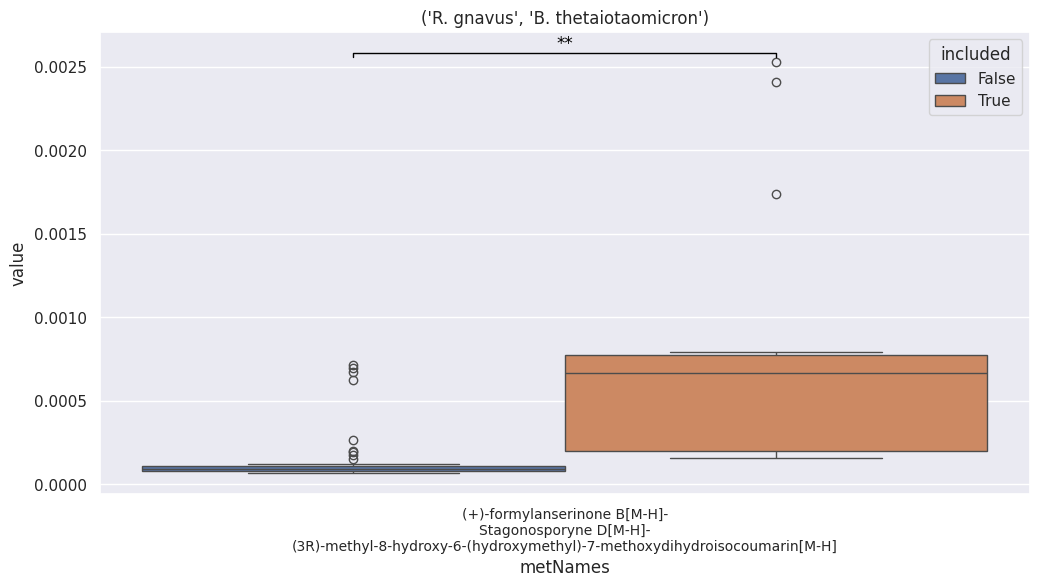

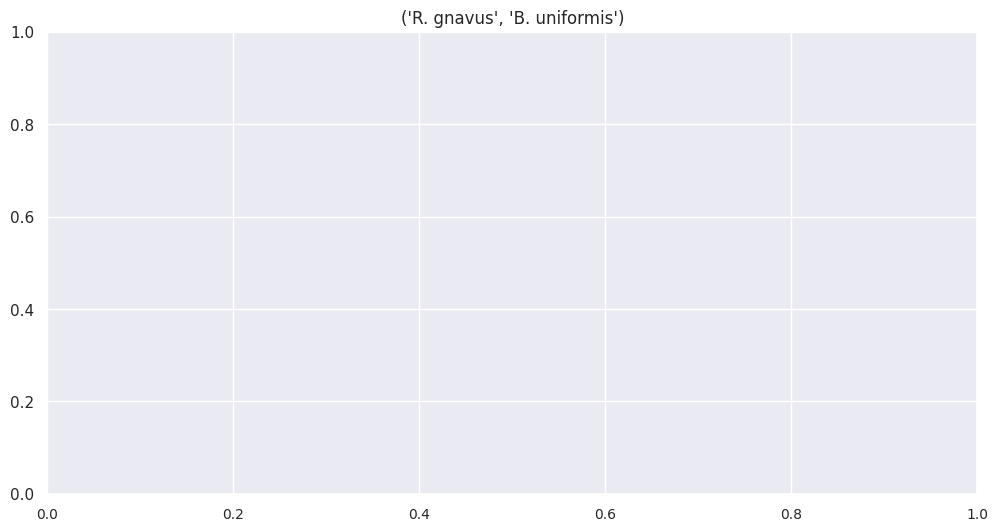

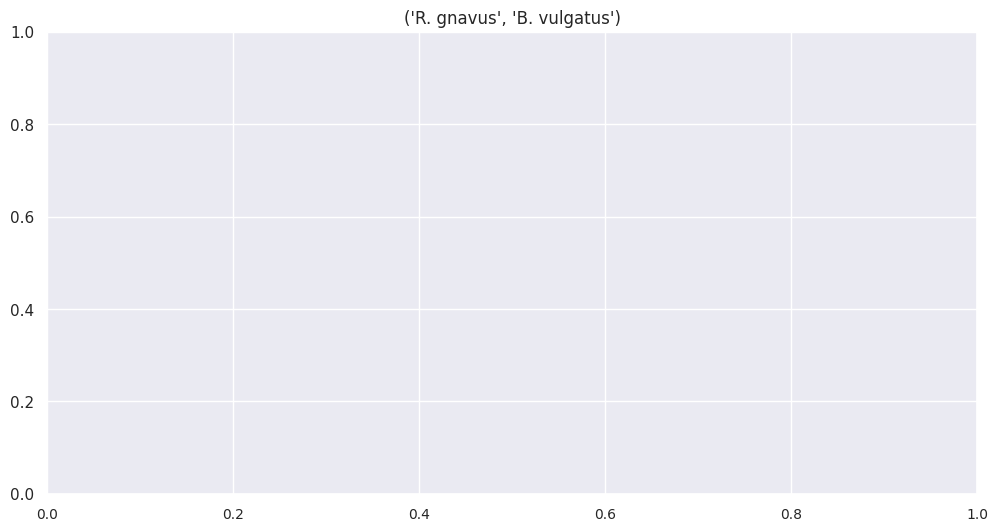

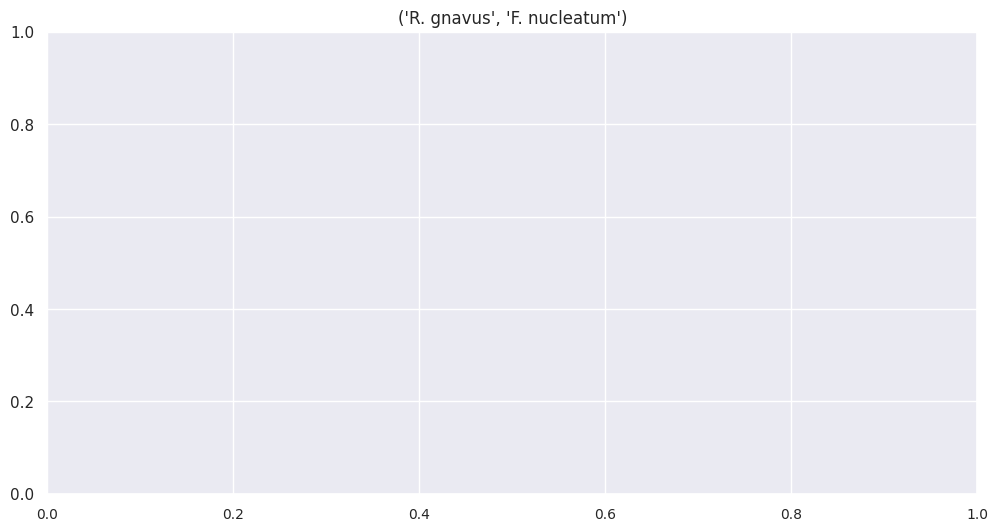

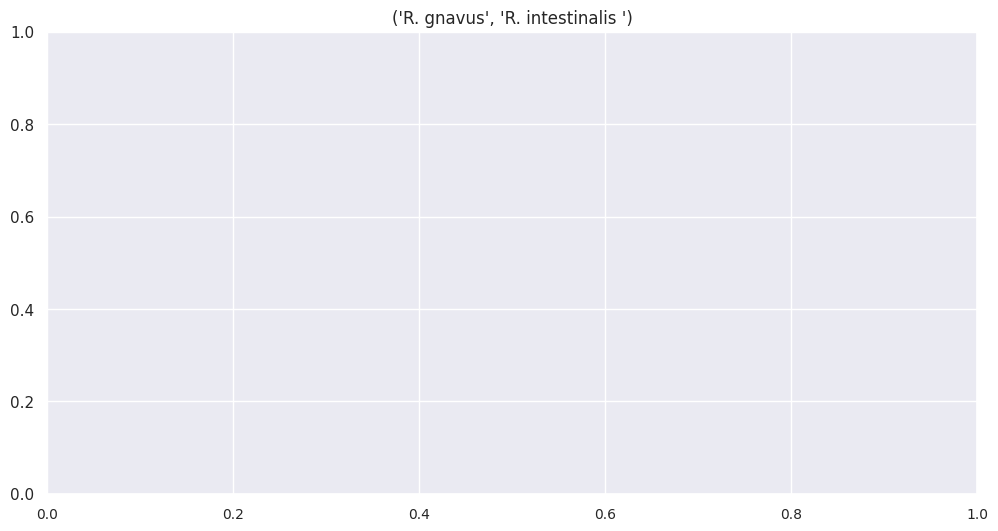

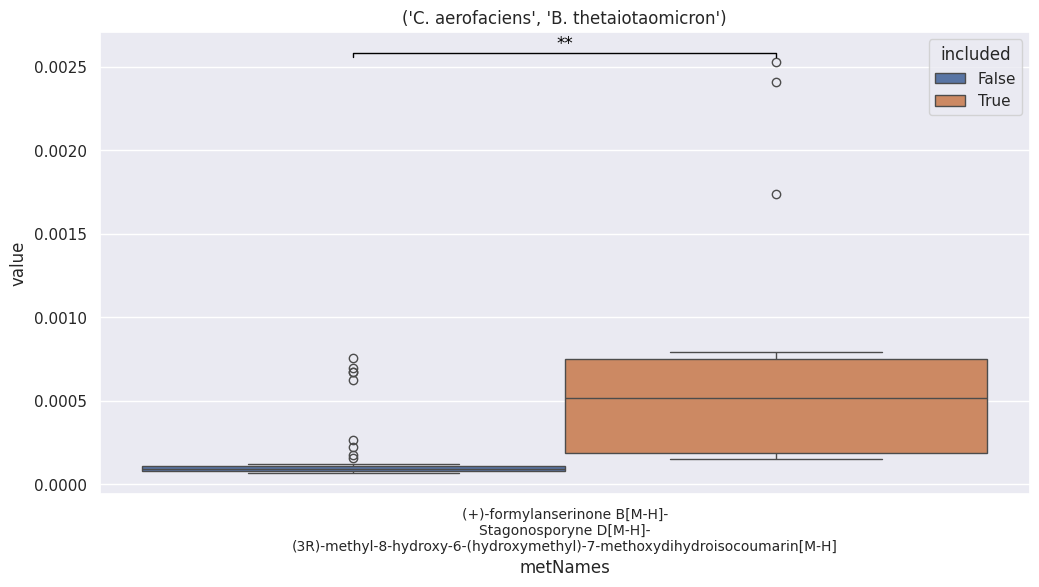

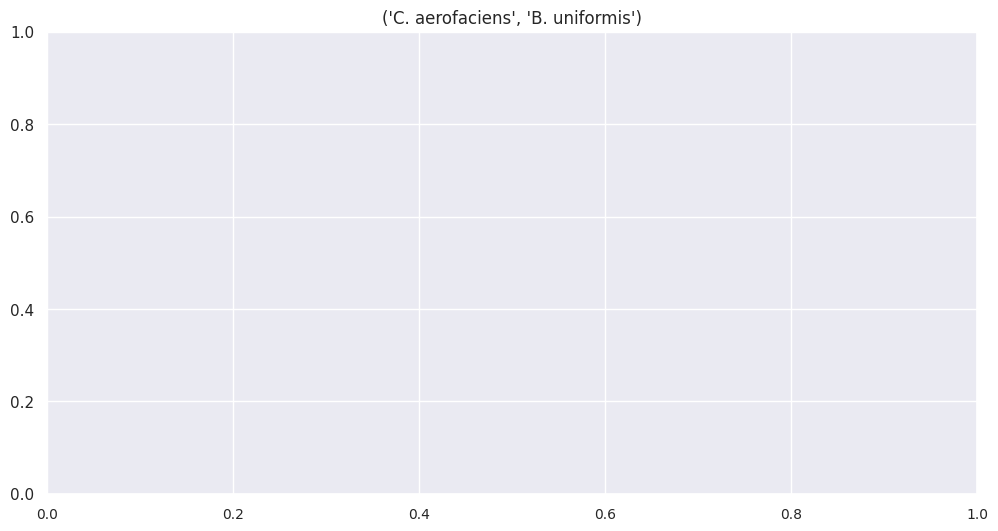

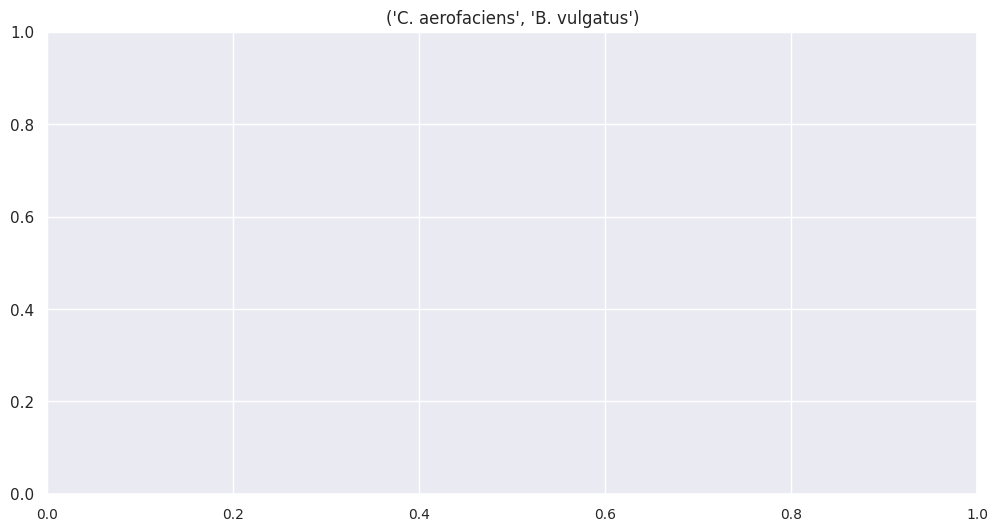

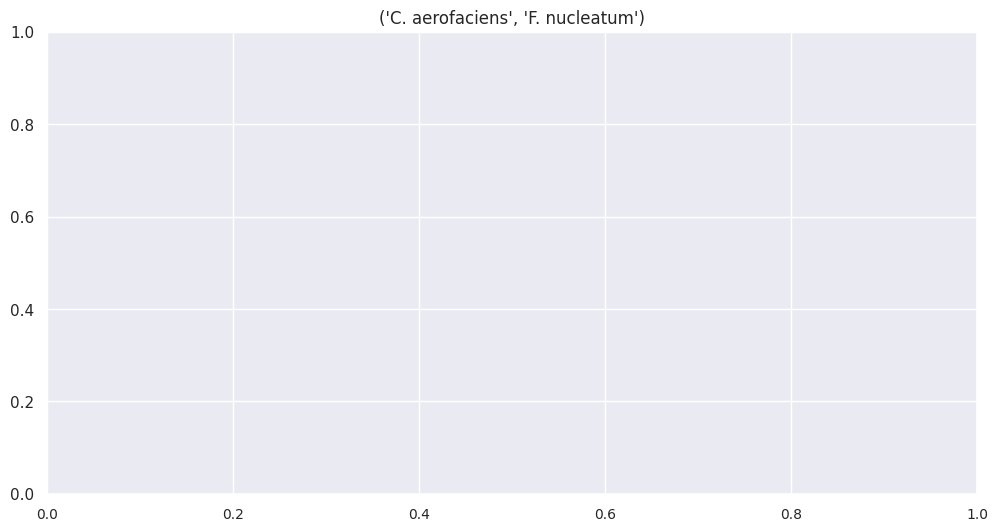

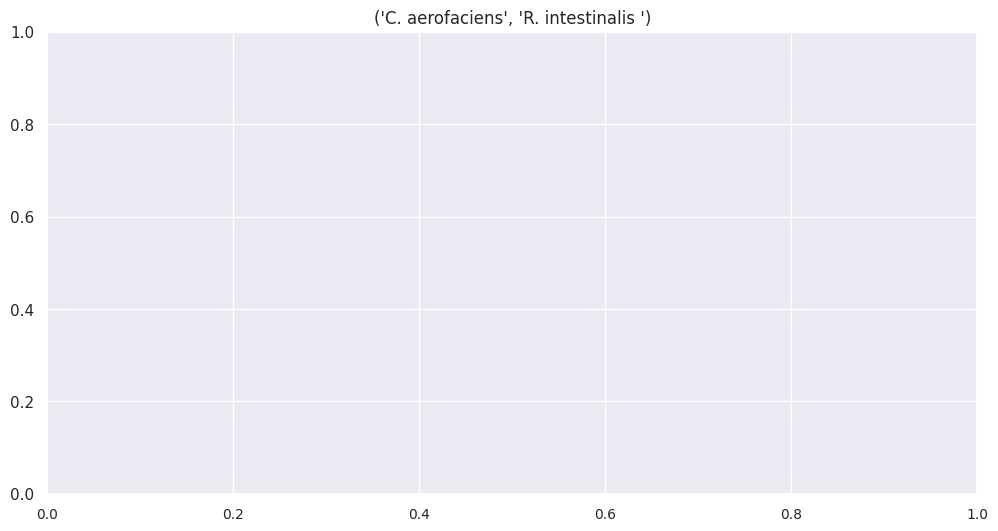

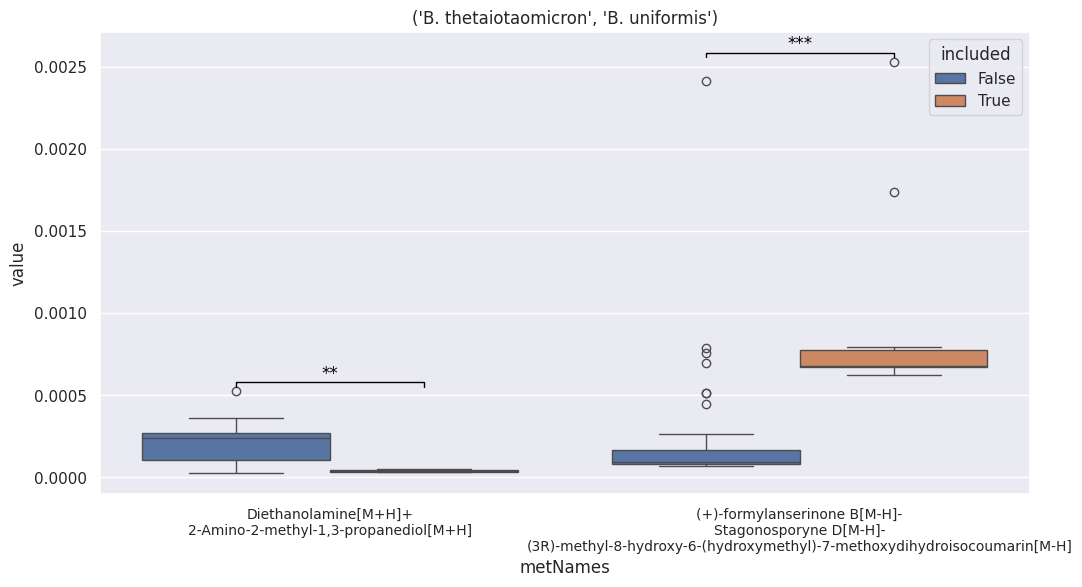

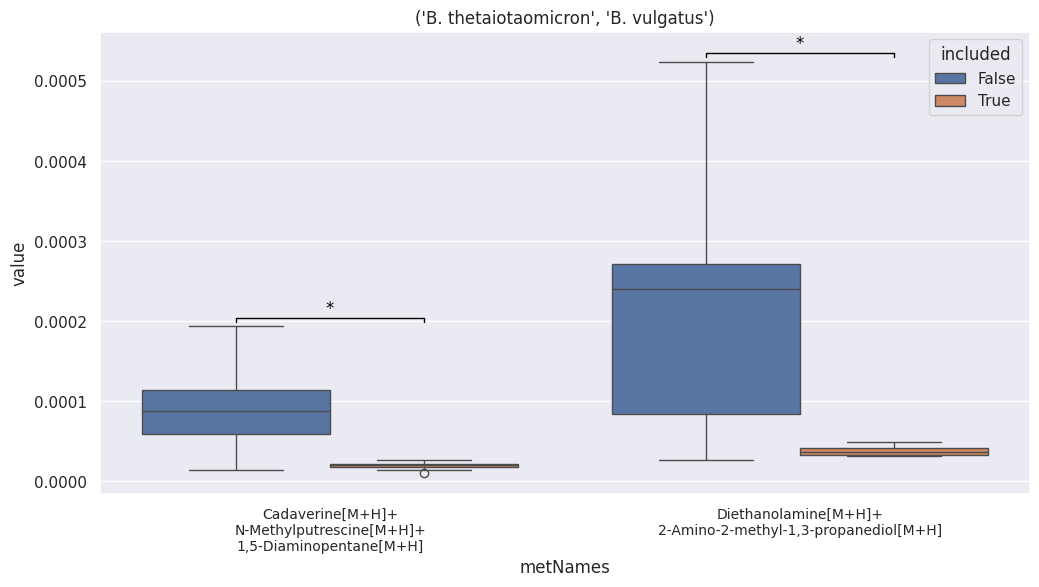

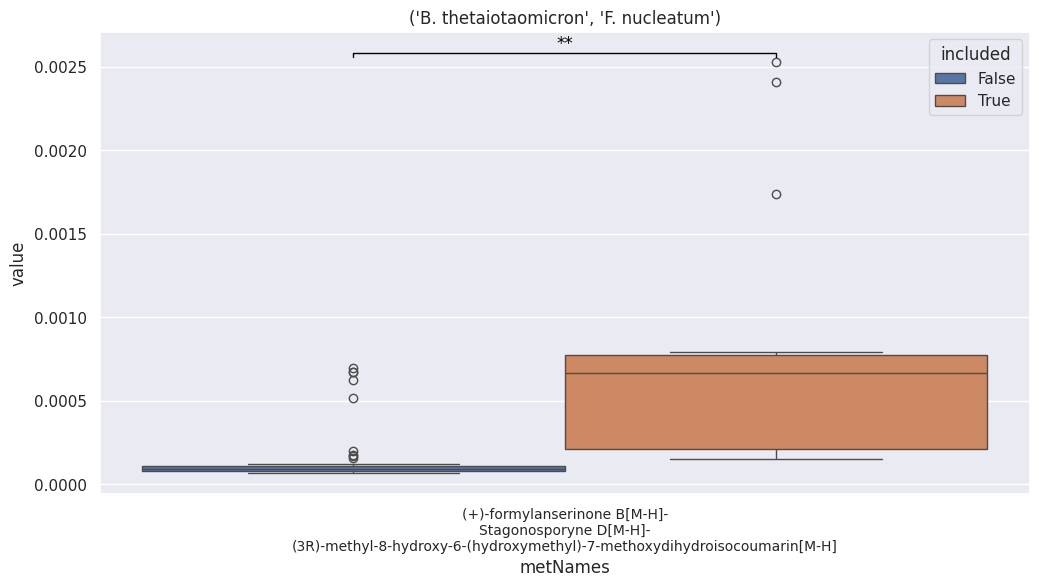

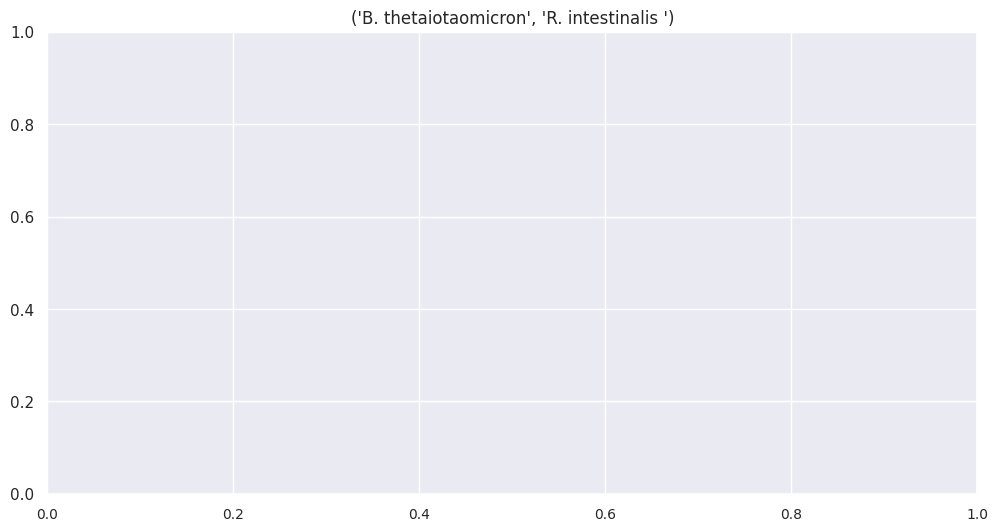

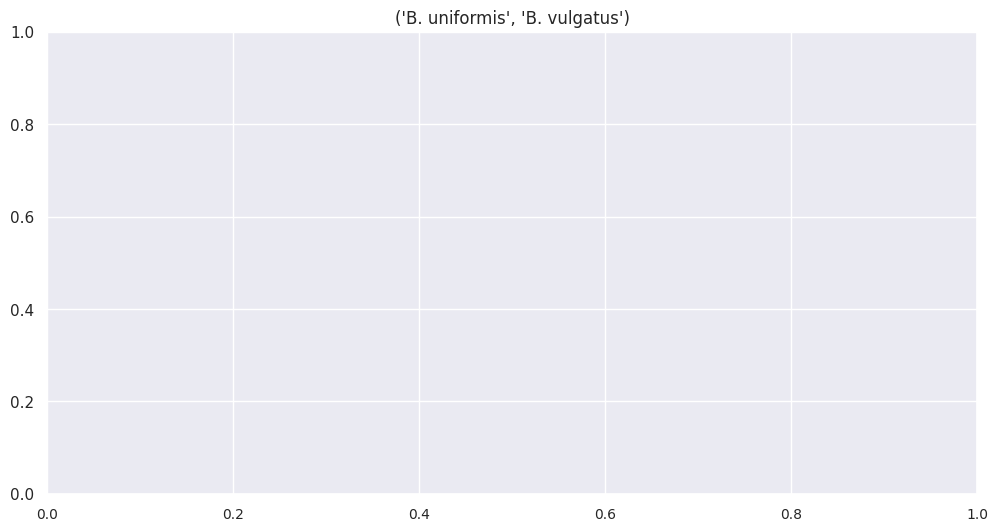

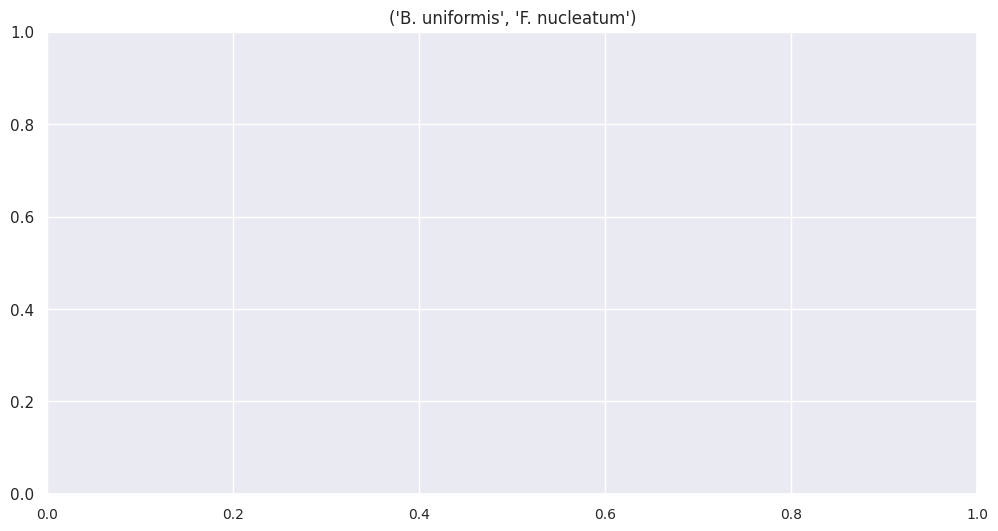

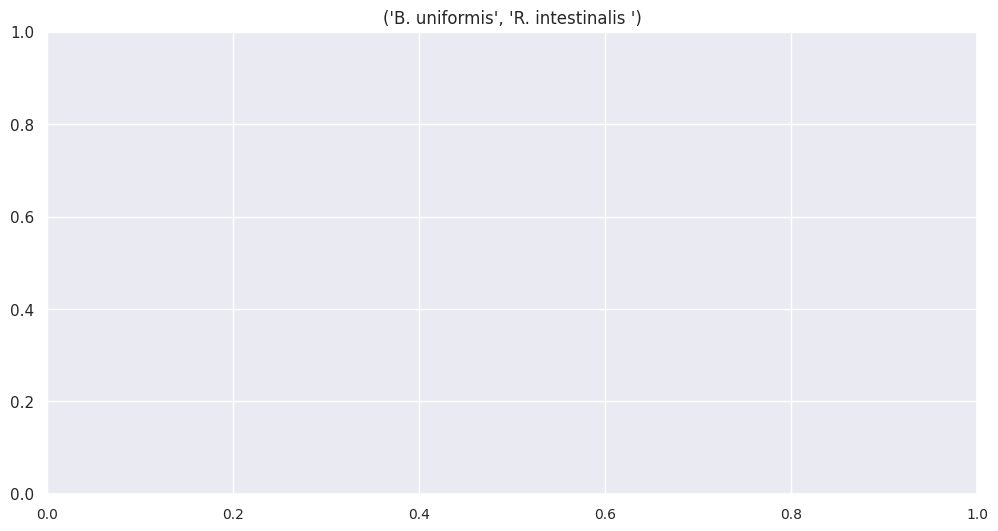

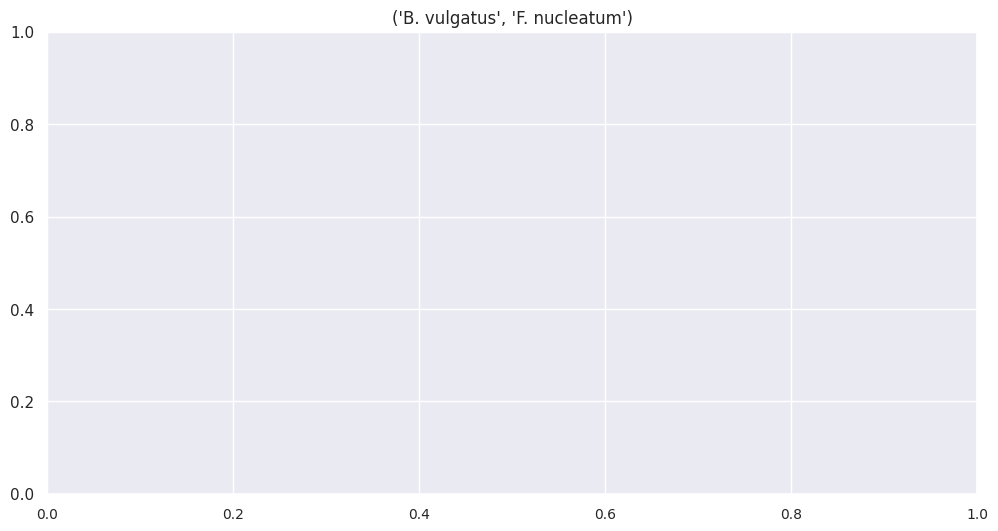

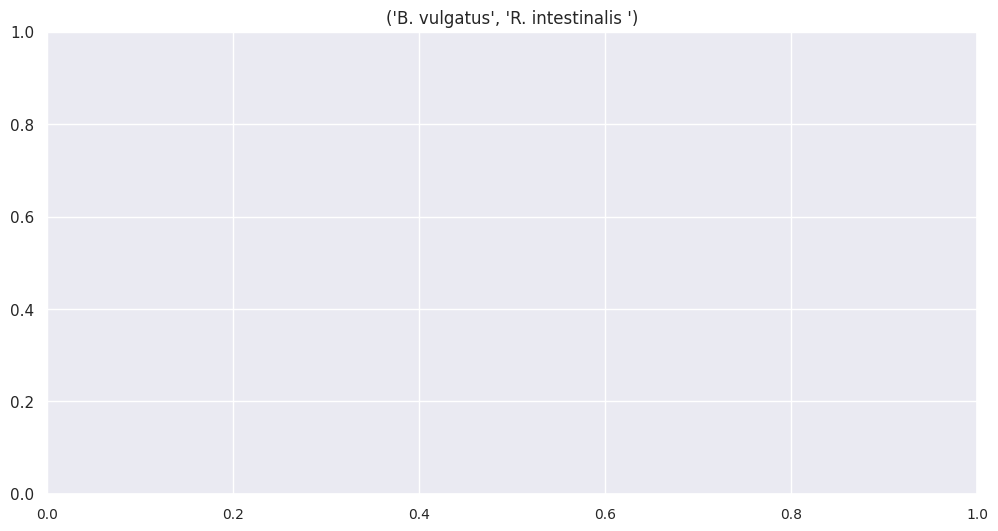

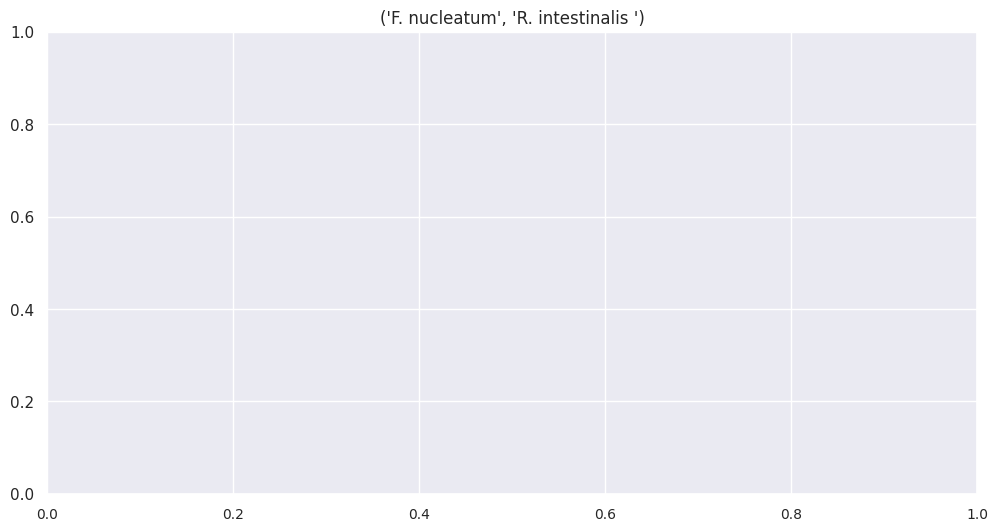

In [17]:
plots_2, axs_2 = significance_plot_batch(metabs_of_interest_2, includes_2, p_vals_2, x_label_rot=0)